##### PAIR PROGRAMMING MODULO 3 - SPRINT 1

In [1]:
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# libreria para cambio de tipo de dato de string a lista
import ast

In [2]:
df = pd.read_csv("datos/pokePd.csv", index_col = 0)
df.head(10)

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,"['Grass', 'Poison']",318,45,49,49,65,65,45
1,Ivysaur,"['Grass', 'Poison']",405,60,62,63,80,80,60
2,Venusaur,"['Grass', 'Poison']",525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,"['Grass', 'Poison']",625,80,100,123,122,120,80
4,Charmander,['Fire'],309,39,52,43,60,50,65
5,Charmeleon,['Fire'],405,58,64,58,80,65,80
6,Charizard,"['Fire', 'Flying']",534,78,84,78,109,85,100
7,Charizard Mega Charizard X,"['Fire', 'Dragon']",634,78,130,111,130,85,100
8,Charizard Mega Charizard Y,"['Fire', 'Flying']",634,78,104,78,159,115,100
9,Squirtle,['Water'],314,44,48,65,50,64,43


- OBJETIVOS:

Los objetivos de hoy son:

1.Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.

2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [3]:
def df_explore(dataframe):
    print(f"El dataframe tiene {dataframe.shape[0]} filas y {dataframe.shape[1]} columnas")
    print("--------------")
    print(f"El dataframe tiene las siguientes columnas:")
    for col in dataframe.columns:
        print(col) 
    print("--------------")
    print(f"Los principales estadísticos de las variables numéricas son:")
    display(dataframe.describe())
    print("--------------")
    print(f"Los principales estadísticos de las variables categóricas son:")
    display(dataframe.describe(include='object'))
    print("--------------")
    print("El porcentaje de nulos por columna:")
    for i, col in enumerate(dataframe.isnull().sum()):
        print(f"{dataframe.isnull().sum().index[i]}: {col/dataframe.shape[0]*100}")
    print("--------------")
    print(f"Hay {dataframe.duplicated().sum()} filas duplicadas.")
    print("--------------")    
    print("A continuación el resultado del método .info():")
    dataframe.info()

In [4]:
df['Type'] = df['Type'].apply(ast.literal_eval)

In [5]:
df = df.explode(['Type']).reset_index(drop=True)

In [6]:
df.head()

,Name,Type,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,Bulbasaur,Grass,318,45,49,49,65,65,45
1,Bulbasaur,Poison,318,45,49,49,65,65,45
2,Ivysaur,Grass,405,60,62,63,80,80,60
3,Ivysaur,Poison,405,60,62,63,80,80,60
4,Venusaur,Grass,525,80,82,83,100,100,80


In [7]:
df.shape

(1580, 9)

In [8]:
df_explore(df)

El dataframe tiene 1580 filas y 9 columnas
--------------
El dataframe tiene las siguientes columnas:
Name
Type
Total
HP
Attack
Defense
Sp.Atk
Sp.Def
Speed
--------------
Los principales estadísticos de las variables numéricas son:


,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000
mean,446.210759,70.527848,81.752532,76.612025,74.415190,73.467722,69.435443
std,122.484221,26.226033,32.716645,31.903226,33.035932,28.179931,29.777541
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,339.500000,53.000000,58.000000,53.000000,50.000000,52.000000,45.000000
50%,466.000000,69.000000,80.000000,70.000000,69.000000,70.000000,67.500000
75%,520.000000,85.000000,100.000000,95.000000,95.000000,90.000000,91.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,180.000000


--------------
Los principales estadísticos de las variables categóricas son:


,Name,Type
count,1580,1580
unique,1034,18
top,Bulbasaur,Water
freq,2,154


--------------
El porcentaje de nulos por columna:
Name: 0.0
Type: 0.0
Total: 0.0
HP: 0.0
Attack: 0.0
Defense: 0.0
Sp.Atk: 0.0
Sp.Def: 0.0
Speed: 0.0
--------------
Hay 0 filas duplicadas.
--------------
A continuación el resultado del método .info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580 entries, 0 to 1579
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     1580 non-null   object
 1   Type     1580 non-null   object
 2   Total    1580 non-null   int64 
 3   HP       1580 non-null   int64 
 4   Attack   1580 non-null   int64 
 5   Defense  1580 non-null   int64 
 6   Sp.Atk   1580 non-null   int64 
 7   Sp.Def   1580 non-null   int64 
 8   Speed    1580 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 111.2+ KB


In [9]:
#df.isnull().sum()

In [10]:
numericas = df.select_dtypes(include= np.number)
numericas.head(2)

,Total,HP,Attack,Defense,Sp.Atk,Sp.Def,Speed
0,318,45,49,49,65,65,45
1,318,45,49,49,65,65,45


In [11]:
categoricas = df.select_dtypes(include= 'object')
categoricas.head(2)

,Name,Type
0,Bulbasaur,Grass
1,Bulbasaur,Poison


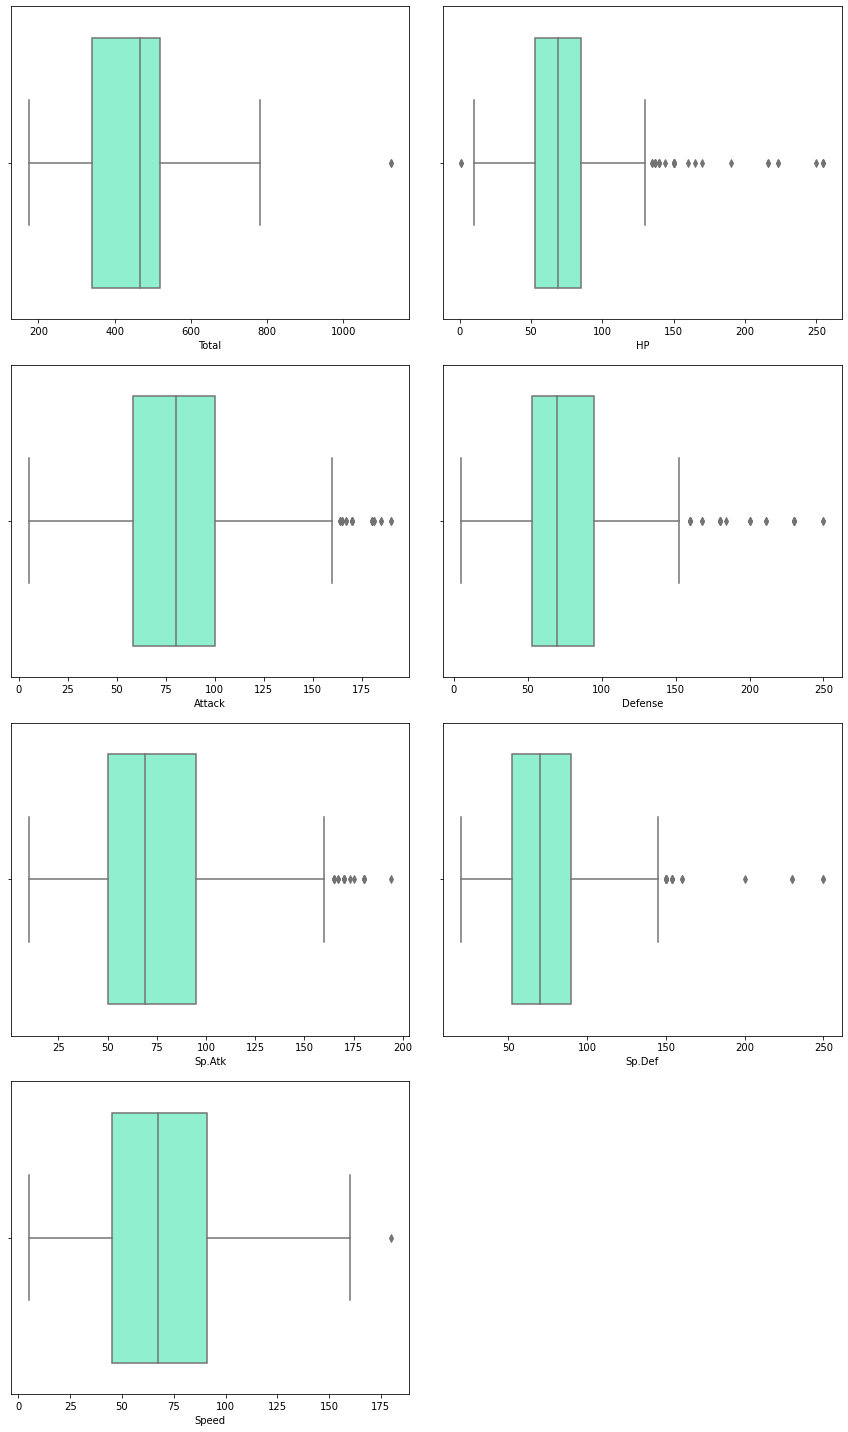

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(12,20))

axes = axes.flat

for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax=axes[indice], color = "aquamarine"); # para trazar una línea de densidad

    
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

In [13]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 

In [14]:
lista_columnas = list(numericas.columns)
ind = detectar_outliers(lista_columnas, df)

In [15]:
ind.keys()

dict_keys(['Total', 'HP', 'Attack', 'Defense', 'Sp.Atk', 'Sp.Def', 'Speed'])

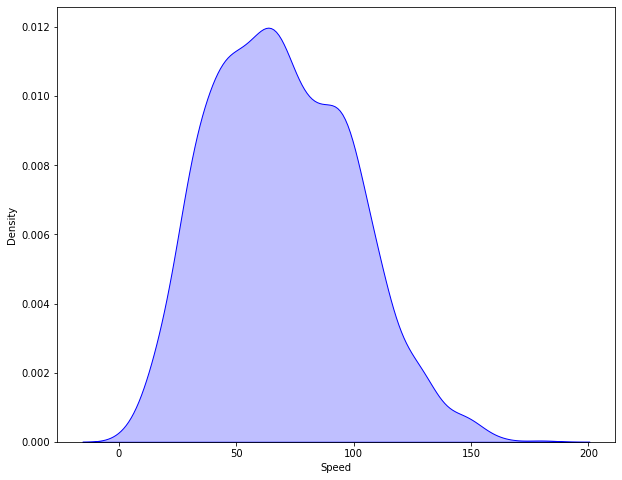

In [16]:

sns.distplot(
    df['Speed'], 
    hist = False, 
    color = "blue", 
    kde_kws = {"shade": True, "linewidth": 1});

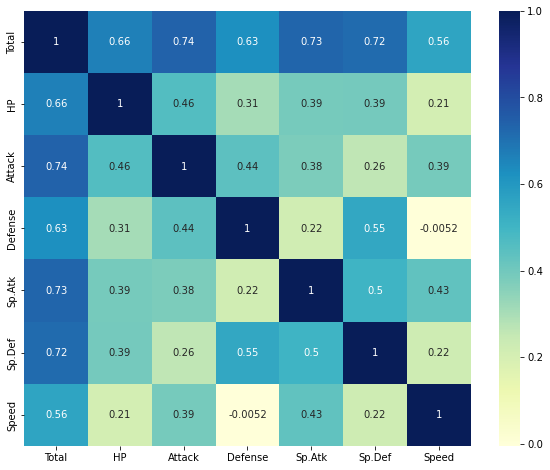

In [17]:
df_numericas = df.select_dtypes(include = np.number)
sns.heatmap(df_numericas.corr(), 
           cmap = "YlGnBu", 
           annot = True);

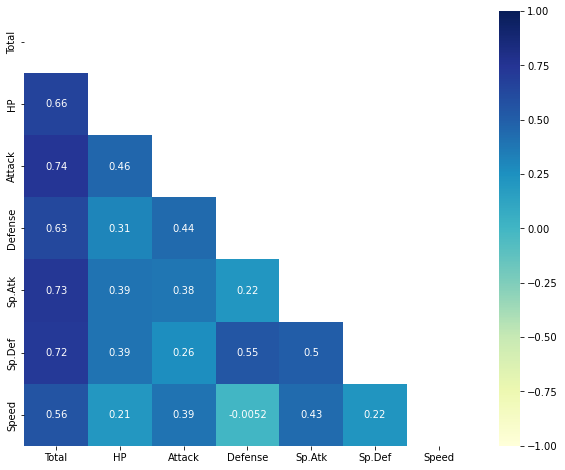

In [18]:
mask = np.triu(np.ones_like(df_numericas.corr(), dtype = np.bool_))

sns.heatmap(df_numericas.corr(), 
           cmap = "YlGnBu", 
            mask = mask,
           annot = True,
           vmin= -1,
           vmax= 1);

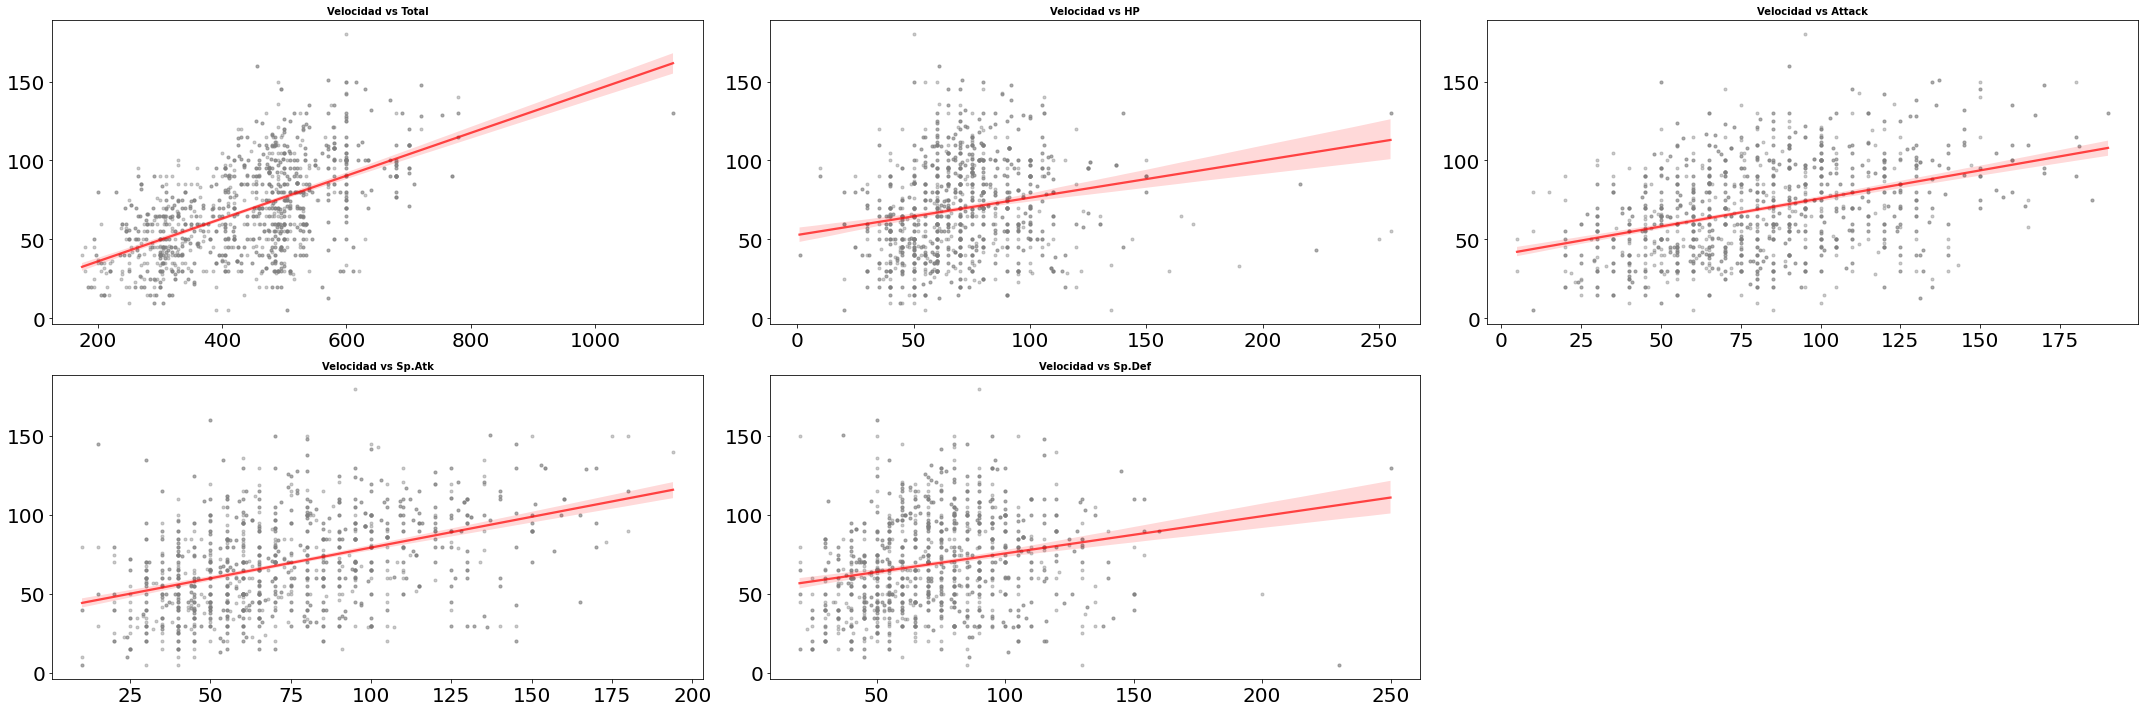

In [19]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 10))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["Speed", "Defense"])

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x = df[colum], 
        y = df["Speed"], 
        color = "gray", 
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }, 
        ax = axes[i])
    
    axes[i].set_title(f"Velocidad vs {colum}", fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
fig.tight_layout()
fig.delaxes(axes[-1]);

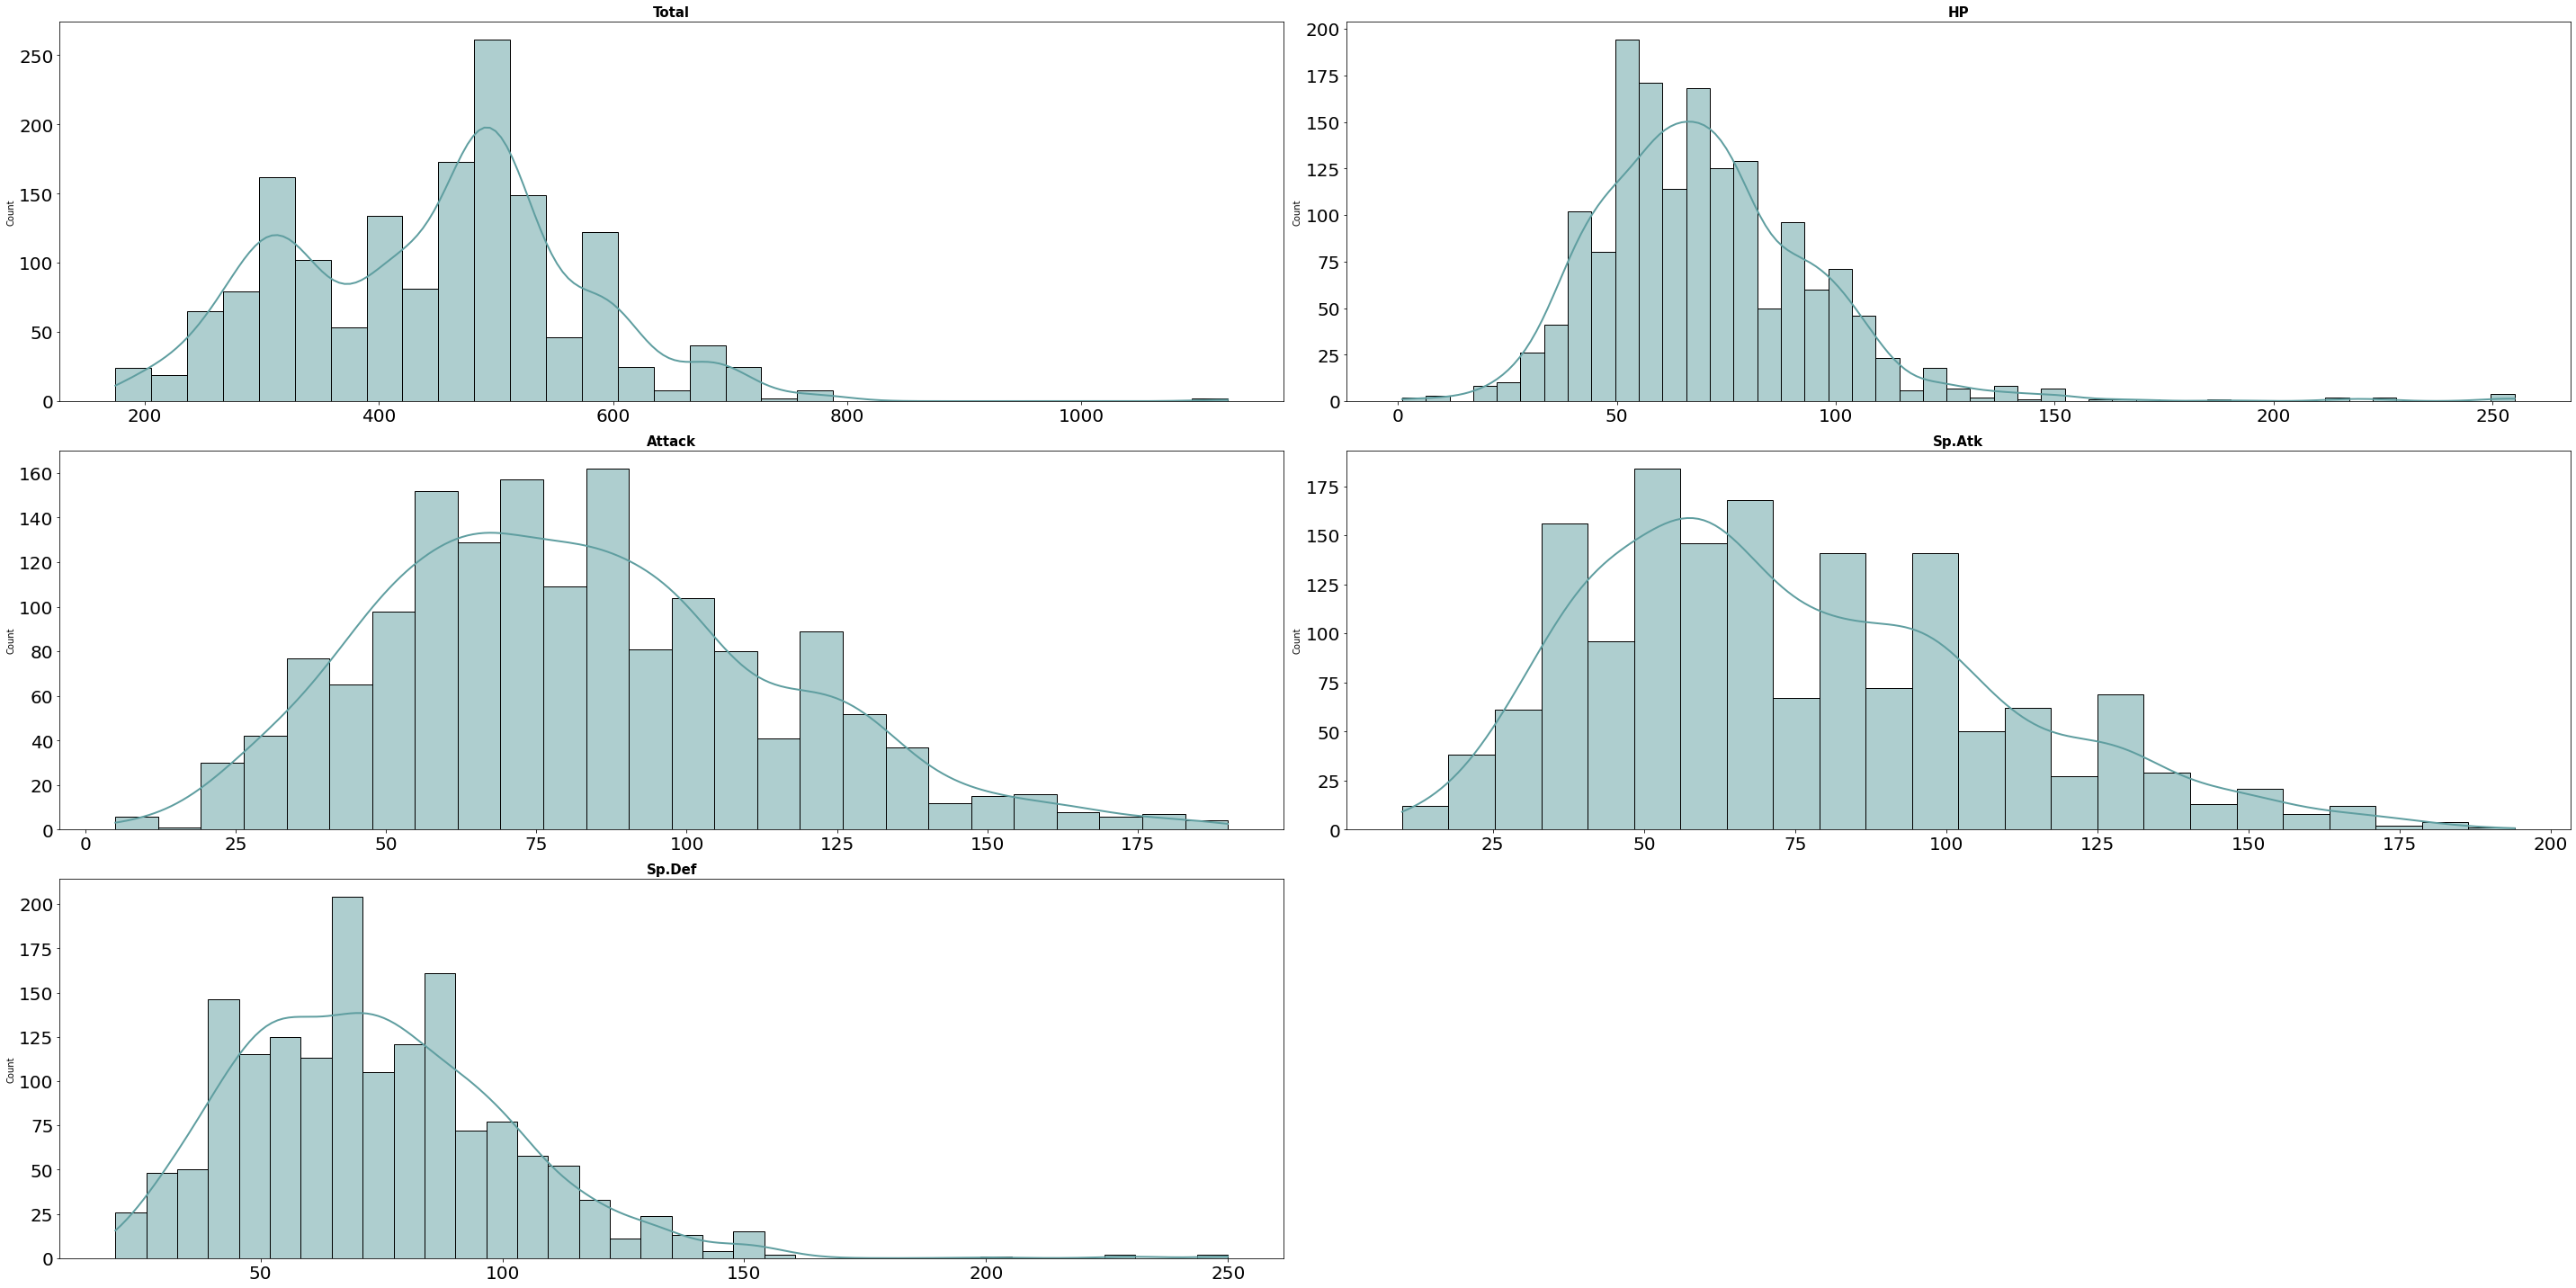

In [24]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (40, 20))


axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns
columnas_numeric = columnas_numeric.drop(["Speed","Defense"])

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        color = "cadetblue", 
        line_kws = {"linewidth": 2}, # para indicar el ancho de las líneas de las barras
        alpha = 0.5, # para especificar la transparencia del color
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1]);
# fig.delaxes(axes[-2])
# fig.delaxes(axes[-3])

In [21]:
df.describe(include= 'object').T

,count,unique,top,freq
Name,1580,1034,Bulbasaur,2
Type,1580,18,Water,154


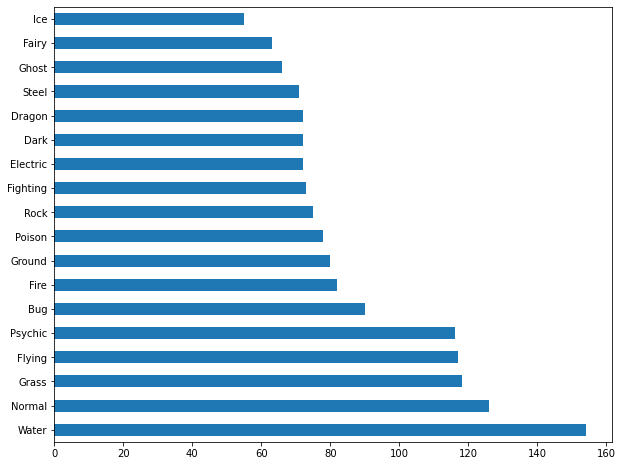

In [22]:
df['Type'].value_counts().plot.barh();

Una vez realizado el EDA, podemos ver que las distribuciones son relativamente normales, con una ligera tendencia positiva (hacia la derecha). En todas las variables que hemos analizado tenemos outliers, que reflejan a los Pokémon que tienen unas caracteristicas muy altas, pero el conteo o la cantidad de ese tipo de Pokemon que nos podemos encontrar es reducida.
Además, que tenga puntuaciones muy altas en una caracteristica no implica que las tenga en el resto de variables, por eso hemos decidido trabajar con los outliers.
Al tener outliers la desviación típica es bastante alta en todos los estadísticos.


## Pair Programming Test Estadísticos

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

- ¿Qué diferencia existe el error de tipo I y el error de tipo II?
- ¿Qué es la asimetría?
- ¿Es vuestra variable respuesta asimétrica?
- ¿Qué tipo de curtosis presenta vuestra variable respuesta?
- ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.